# Problem Statement 

A Marketing company  done one campaign using FaceBook Ads and Google Ads they want to do Hypothesis Test,which one is good .


# Understanding the Problem Statement


Business Objective:Find out Which is Cost effective .

Constraints :Minimse the cost.


# Understanding Success Criteria  for Given Problem


Business Success Criteria:Reduce the cost and increse the reach.

Economical success Criteria:Increase the revenue by 25%.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/Users/macbookpro/Downloads/New Folder With Items/marketing_campaign.csv')
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [3]:
# Returns number of rows and columns of the dataset
df.shape

(365, 17)

In [4]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [5]:
#Changing DataTypes 
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
# Returns the Descriptive summary of dataset
df.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


# Univariate Analysis

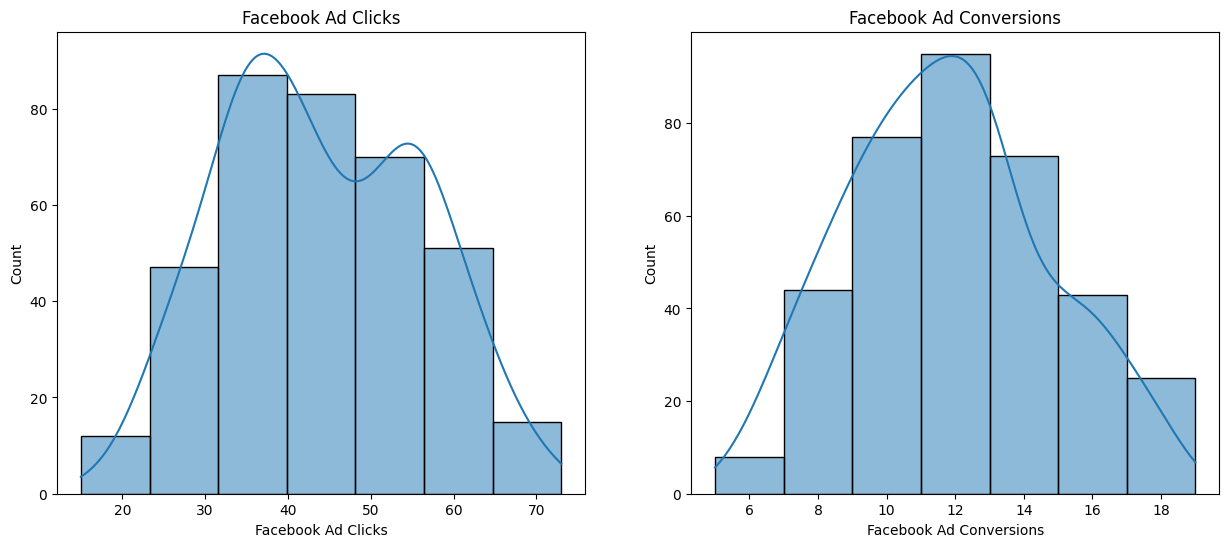

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks' ],bins=7,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions' ],bins=7,edgecolor='k',kde=True)
plt.show()


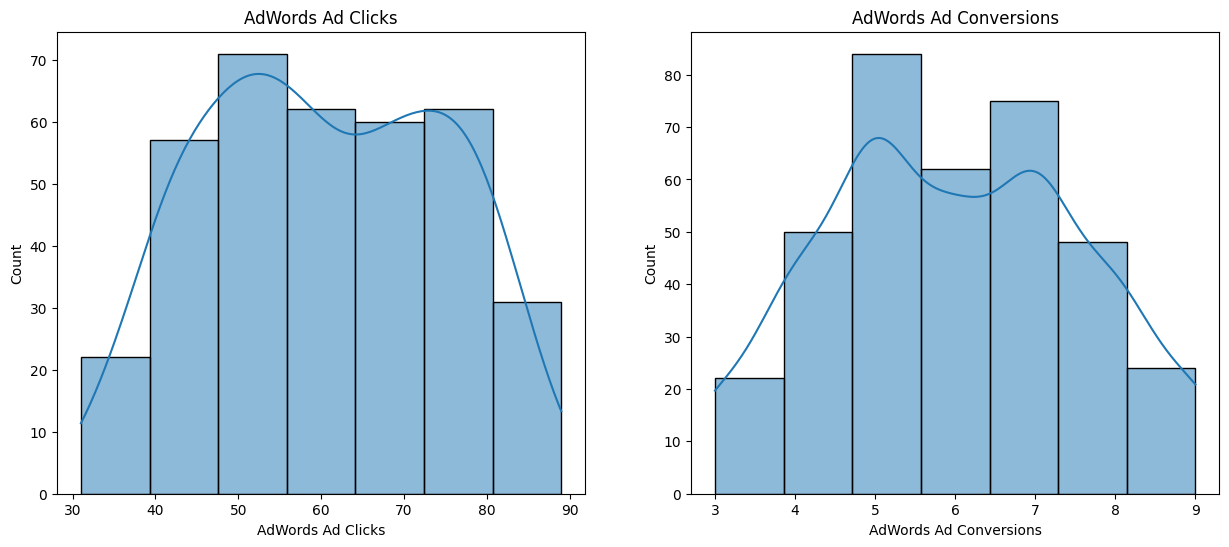

In [8]:

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks' ],bins=7,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions' ],bins=7,edgecolor='k',kde=True)
plt.show()

In [9]:
df['Facebook Ad Conversions']

0       8
1      12
2       8
3       9
4       7
       ..
360    13
361    18
362    13
363     8
364    17
Name: Facebook Ad Conversions, Length: 365, dtype: int64

In [10]:
df['AdWords Ad Conversions']

0      5
1      6
2      4
3      5
4      7
      ..
360    9
361    6
362    6
363    6
364    6
Name: AdWords Ad Conversions, Length: 365, dtype: int64

In [11]:
def create_conversion_category(conversion_col):
    category =[]
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion <11:
            category.append(' 6 - 10')
        elif 11<= conversion <16:
            category.append('10 - 15')
        else :
            category.append('more than 15')
    return category

In [12]:
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions') 

In [13]:
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions') 

In [14]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()
df['Facebook Conversion Category'].value_counts()

10 - 15         189
 6 - 10         128
more than 15     47
less than 6       1
Name: Facebook Conversion Category, dtype: int64

In [15]:
facebook =pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,index,Category
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [16]:
df['AdWords Conversion Category'].value_counts()

adwords =pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords


,index,Category
0,6 - 10,209
1,less than 6,156


In [17]:
category_df = pd.merge(facebook,adwords,on = 'Category',how='outer').fillna(0)
category_df

,index_x,Category,index_y
0,10 - 15,189,0
1,6 - 10,128,0
2,more than 15,47,0
3,less than 6,1,0
4,0,209,6 - 10
5,0,156,less than 6


In [18]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,index_x,Category,index_y
3,less than 6,1,0
1,6 - 10,128,0
0,10 - 15,189,0
2,more than 15,47,0


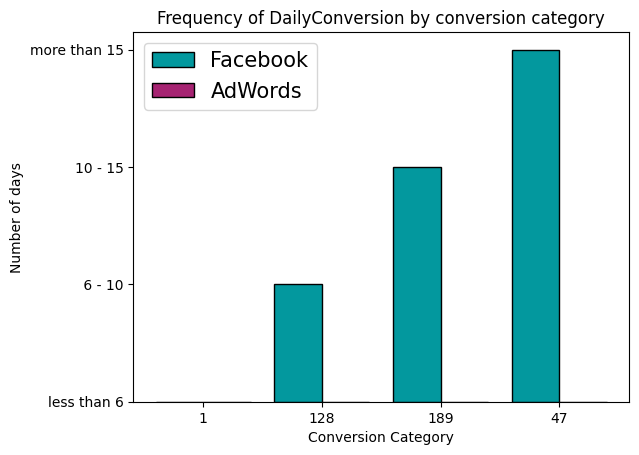

In [21]:
X_axis = np.arange(len(category_df))
#plt.figure(figsize=(12,6))
plt.bar(X_axis - 0.2,category_df['index_x'],0.4,label='Facebook',color='#03989E',linewidth=1,edgecolor='k')
plt.bar(X_axis + 0.2,category_df['index_y'],0.4,label='AdWords',color='#A62372',linewidth=1,edgecolor='k')
plt.xticks(X_axis,category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of days")
plt.title("Frequency of DailyConversion by conversion category")
plt.legend(fontsize=15)
plt.show()

Text(0, 0.5, 'Conversion')

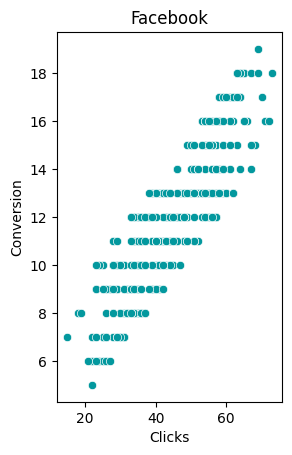

In [22]:
plt.figsize=(15,6)
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'],color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversion')

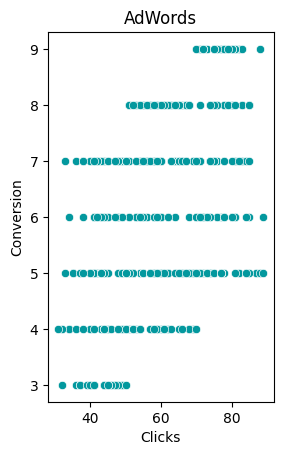

In [23]:
plt.figsize=(15,6)
plt.subplot(1,2,1)
plt.title('AdWords')
sns.scatterplot(x=df['AdWords Ad Clicks'],y=df['AdWords Ad Conversions'],color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.show()

In [24]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [25]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [26]:
print('Conversion Coeff \n------------')
print('Facebook : ',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Conversion Coeff 
------------
Facebook :  0.87
AdWords :  0.45


In [27]:
#hypothesis testing
print('Mean Conversion\-----------')
print('Facebook : ',round(df['Facebook Ad Conversions'].mean(),2))   
print('AdWords : ',round(df['AdWords Ad Conversions'].mean(),2))

Mean Conversion\-----------
Facebook :  11.74
AdWords :  5.98


In [28]:
t_stats,p_value = st.ttest_ind(a=df['Facebook Ad Conversions'] ,b=df['AdWords Ad Conversions'],equal_var=False)
print('\n T statistics',t_stats , '\np-value',p_value)


 T statistics 32.88402060758184 
p-value 9.348918164530465e-134


In [29]:
if p_value <0.5:
    print("\n p-value is less than significance value,Reject the null hypothesis")
else:
    print("\n p_value is greater than significance value,accept the null hypothesis")


 p-value is less than significance value,Reject the null hypothesis


In [30]:
#regression analysis
X = df[['Facebook Ad Clicks']]
y = df['Facebook Ad Conversions'] 

In [31]:
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

r2 = r2_score(y,prediction)*100
mse = mean_squared_error(y,prediction)
print('Accuracy(R2 score):',round(r2,2),'%')
print('Mean Squared error:',round(mse,2))

Accuracy(R2 score): 76.35 %
Mean Squared error: 2.02


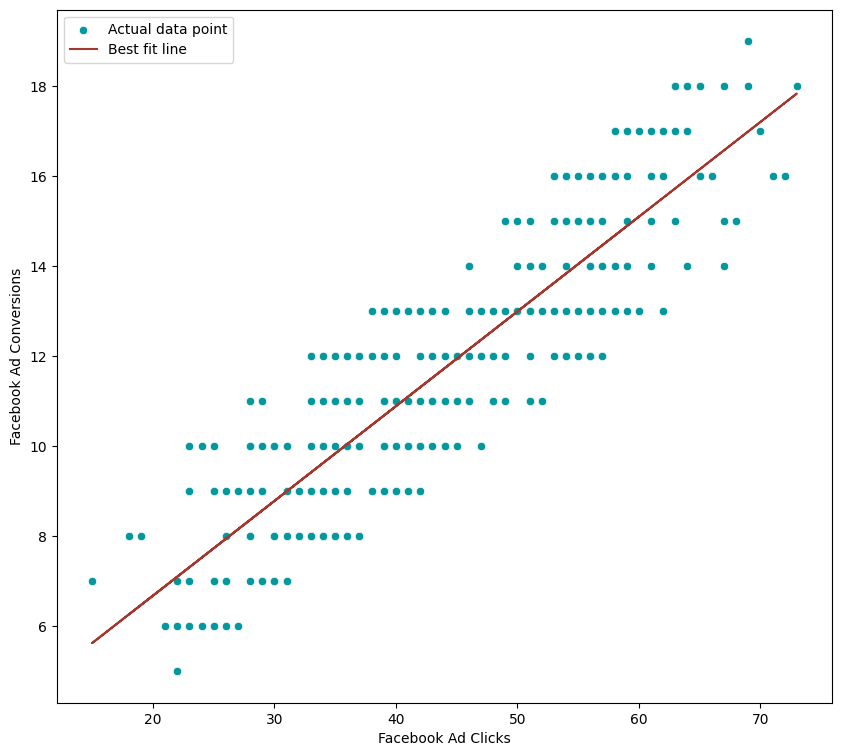

In [32]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'],color='#03989E',label='Actual data point')
plt.plot(df['Facebook Ad Clicks'],prediction,color='#A6372E',label='Best fit line')
plt.legend()
plt.show()

In [33]:
print(f'For {50} Clicks,Expected Conversion : {round(reg_model.predict([[50]])[0],2)}')
print(f'For {80} Clicks,Expected Conversion : {round(reg_model.predict([[80]])[0],2)}')

For 50 Clicks,Expected Conversion : 13.0
For 80 Clicks,Expected Conversion : 19.31


In [35]:
#Cleaning data
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'] .apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:])) 

In [36]:
df = df[['Date', 'Facebook Ad Views','Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
         'Facebook Click-Through Rate (Clicks / View)',
         'Facebook Conversion Rate (Conversions / Clicks)',
         'Facebook Cost per Click (Ad Cost / Clicks)' ]]  
df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


In [37]:
#extracting month  and week day from the date columns
df['month'] = df['Date'].dt.month
df['week']  = df['Date'].dt.month

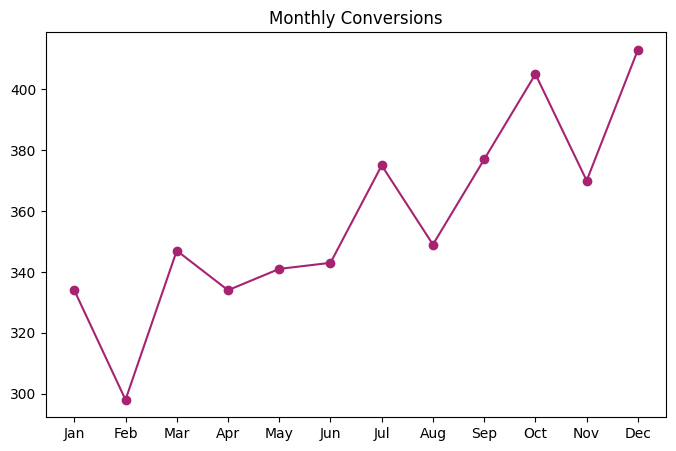

In [39]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names,monthly_conversion['Facebook Ad Conversions'],'-o' ,color='#A62372')
plt.show()

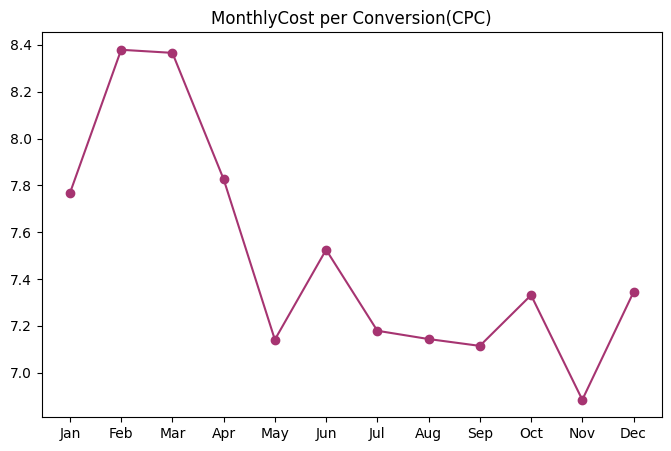

In [40]:
#montly cost per click
plt.figure(figsize=(8,5))
plt.title('MonthlyCost per Conversion(CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names,monthly_df['Cost per Conversion'],'-o',color='#A63471')
plt.show()

In [41]:
#long-term equlibrium
score,p_value,_ = coint(df['Cost per Facebook Ad'],df['Facebook Ad Conversions'])
print('cointegration test score:',score)
print('p_value:',p_value)
if p_value <0.05:
    print("\n p-value is less than significance value,Reject the null hypothesis")
else:
    print("\n p-value is greater than significance value,Accept the null hypothesis")

cointegration test score: -14.755428385103215
p_value: 2.1337375979061323e-26

 p-value is less than significance value,Reject the null hypothesis
